# CS366 Final Project - Myers-Briggs

#### by Kaya Deuser and Madison Stiefel

We use a dataset from [Kaggle](https://www.kaggle.com/datasnaek/mbti-type), that was collected from the [Personality Cafe forum](https://www.personalitycafe.com/forum/). The dataset contains the a persons 4 letter MBTI type and the last 50 things they posted on the forums. In total there are over 8600 rows of data corresponding to different users. 

### Myers-Briggs
There are a total  of 16 distict and different personality types that the Myers-Briggs Type Indicator (MBTI) assigns:

|  ES  |  IS  |  EN  |  IN  |
|------|------|------|------|
| ESTJ | ISTJ | ENTJ | INTJ |
| ESTP | ISTP | ENTP | INTP |
| ESFJ | ISFJ | ENFJ | INFJ |
| ESFP | ISFP | ENFP | INFP |


- Introversion (I) – Extroversion (E)
- Intuition (N) – Sensing (S)
- Thinking (T) – Feeling (F)
- Judging (J) – Perceiving (P)


In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [147]:
data = pd.read_csv('/users/kdeuser/Desktop/CMPU366/FinalProject/mbti_1.csv') 
datawc = data
data.head()


type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...

The user posts are split by ||| between each post, so in order to see a list of the posts we split by the |||'s'

In [148]:
[p.split('|||') for p in data.head(2).posts.values]

[["'http://www.youtube.com/watch?v=qsXHcwe3krw",
  'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
  'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
  'What has been the most life-changing experience in your life?',
  'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
  'May the PerC Experience immerse you.',
  'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
  "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
  '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04

In [149]:
# create table ptypes for later
ptypes = datawc.groupby('type').agg(lambda x: list(x))
ptypes

posts
type                                                   
ENFJ  ['https://www.youtube.com/watch?v=PLAaiKvHvZs|...
ENFP  ['He doesn't want to go on the trip without me...
ENTJ  ['You're fired.|||That's another silly misconc...
ENTP  ['I'm finding the lack of me in these posts ve...
ESFJ  ['Why not?|||Any other ESFJs originally mistyp...
ESFP  ['Edit: I forgot what board this was on.|||I a...
ESTJ  [this is such a catch 22 |||I'm here! Although...
ESTP  [Splinter Cell Blacklist for Xbox 360.|||ESTPs...
INFJ  ['http://www.youtube.com/watch?v=qsXHcwe3krw||...
INFP  ['I think we do agree. I personally don't cons...
INTJ  ['Dear INTP,   I enjoyed our conversation the ...
INTP  ['Good one  _____   https://www.youtube.com/wa...
ISFJ  ['I love feeling affectionate for the one I lo...
ISFP  ['They paint without numbers|||I'd guess at is...
ISTJ  ['Newton's Universal Gravity Law. I mean serio...
ISTP  ['I got 593.  From what I've read about the En...

### Distribution of the MBTI personality types

We want to show the ditribution of the MBTI types in the datasets

In [150]:
data.groupby('type').agg({'type':'count'})

type
type      
ENFJ   190
ENFP   675
ENTJ   231
ENTP   685
ESFJ    42
ESFP    48
ESTJ    39
ESTP    89
INFJ  1470
INFP  1832
INTJ  1091
INTP  1304
ISFJ   166
ISFP   271
ISTJ   205
ISTP   337

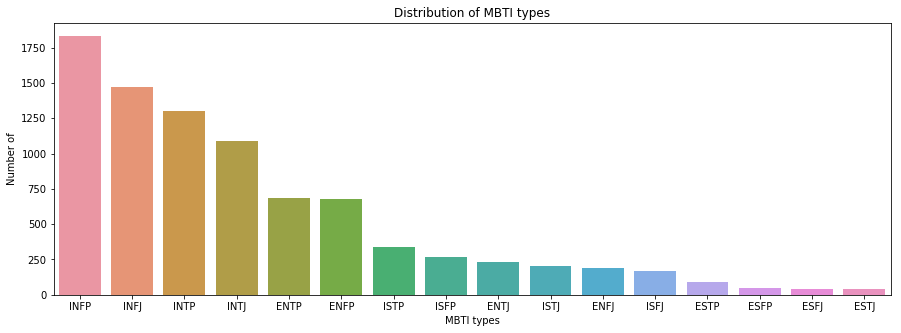

In [151]:
# get the count of each personality type
types = data['type'].value_counts()

# create the table
plt.figure(figsize=(15,5))
sns.barplot(types.index, types.values)
plt.xlabel('MBTI types')
plt.ylabel("Number of")
plt.title('Distribution of MBTI types')
plt.show()

This shows that the dataset has a very skewed distribution of MBTI types. The most common MBTI type in the dataset is INFP, with 1832 users, and the least common is ESTJ, with 39 users. In general there seem to be far more Introverted users than Extroverted users.

This makes the dataset not very reliable as there is little availble to analyze the lesser common user MBTI types. We intended to go to the personality cafe forums to gather more data from users that have the lesser represented types, however the website is currently limited to what can be accessed, as it is under matinence, so user posts can no longer be seen.

### Comment Information

Next, we want to look at the information about the comments made by each user and each MBTI personality type

In [152]:
#word counts of comments
def comment_split(row):
    comments = []
    for i in row.split('|||'):
        comment_len = len(i.split())
        comments  = np.append(comments, comment_len)
    return comments
        
data['number of words per user'] = data['posts'].apply(lambda x : sum(comment_split(x)))
data['average number of words per comment'] = data['posts'].apply(lambda x: len(x.split())/ 50)
data.head()

type                                              posts  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
1  ENTP  'I'm finding the lack of me in these posts ver...   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   
4  ENTJ  'You're fired.|||That's another silly misconce...   

   number of words per user  average number of words per comment  
0                     605.0                                11.12  
1                    1219.0                                23.40  
2                     885.0                                16.72  
3                    1113.0                                21.28  
4                    1016.0                                19.34

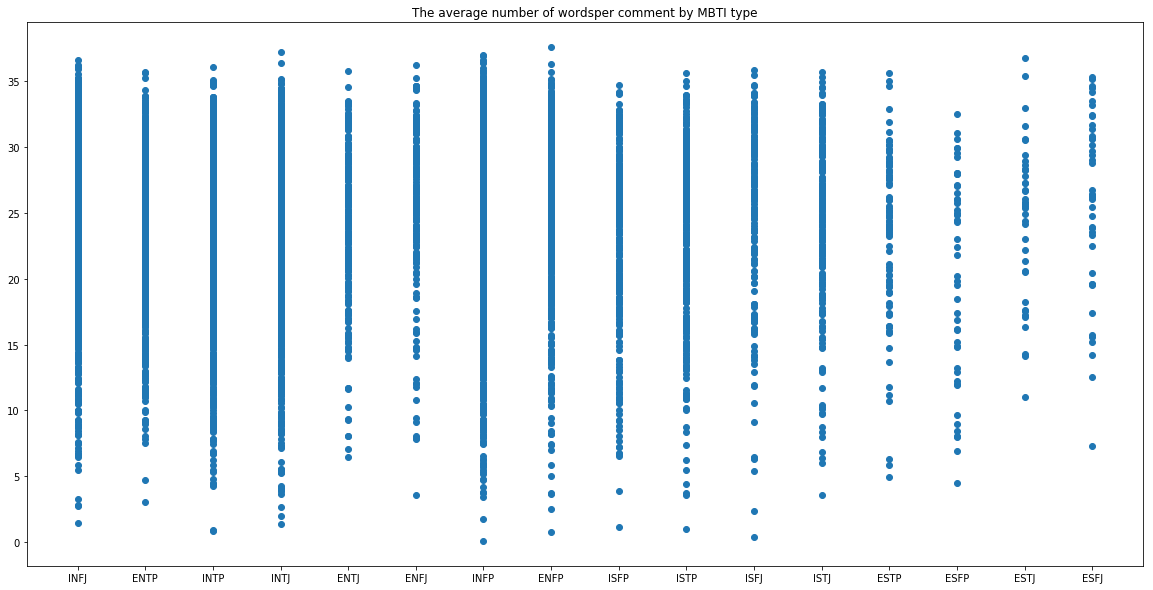

In [153]:
# plot the average. numberof words per comment against the. type
plt.figure(figsize=(20,10))
plt.title('The average number of wordsper comment by MBTI type')
plt.scatter('type', 'average number of words per comment', data=data)

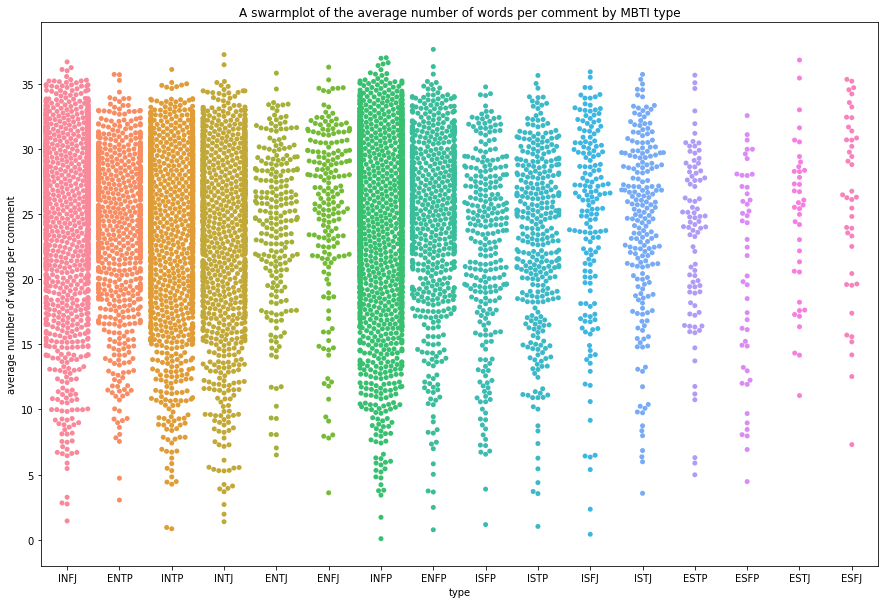

In [154]:
plt.figure(figsize=(15,10))
plt.title('A swarmplot of the average number of words per comment by MBTI type')
sns.swarmplot('type', 'average number of words per comment', data=data)

### Word Clouds for individual MBTI Types
Athought there is a more accurate word cloud created later once the posts have been preproccessed, these word clouds are created to show the frequent words used by each individual MBTI personality type. By ordering the MBTI type and looking at all of their comments we are able to create word cloud of their frequently used words.

In [155]:
cols = ptypes.columns
print(cols)

Index(['posts'], dtype='object')


In [156]:
ptypes['posts'][2]

["'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to.   Nobody wants to be approached with BS...|||But guys... he REALLY wants to go on a super-duper-long-ass vacation. C'mon guys. His boss just doesn't listen or get it. He even approached him logically and everything.|||Never mind. Just go on permanent vacation.|||Two months? I wouldn't be crazy about the idea. If you are really his best employee, then that's what may be cooking him. Who wants their most reliable asset gone for that long?  ENTJ employer...|||Lol. Its not like our views were unsolicited. What a victim.|||Sometimes I just really like impoverished rap music.   https://www.youtube.com/watch?v=Xh0vA6_8mv8|||I probably would have lost it too. His stonewalling was insignificant. He was being an idiot over semantics that didn't have any impact on anything. It's one thing to stone wall on critical shit, but...|||I w

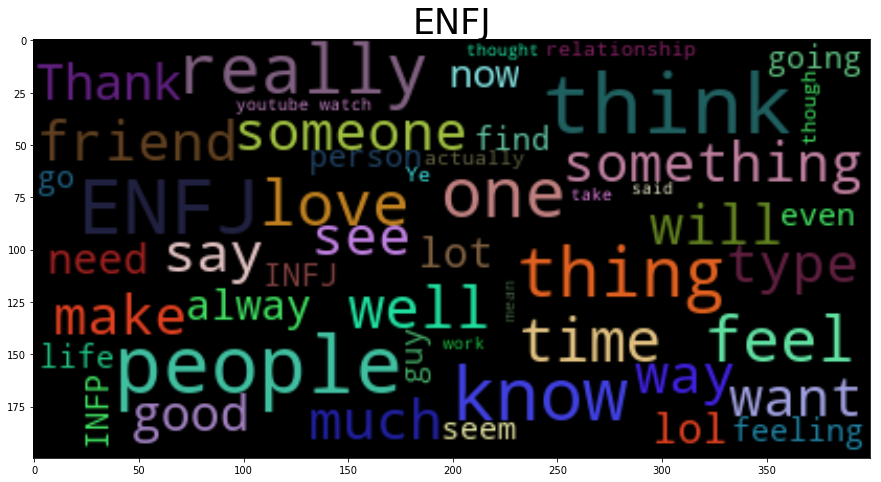

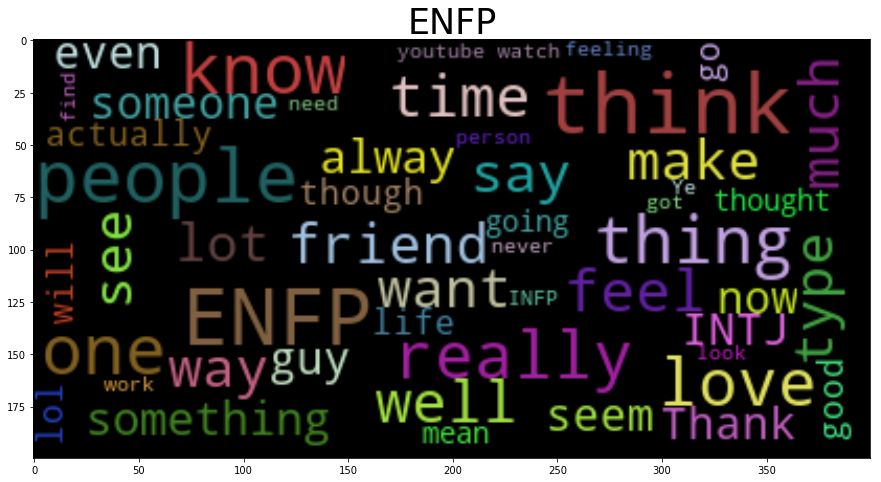

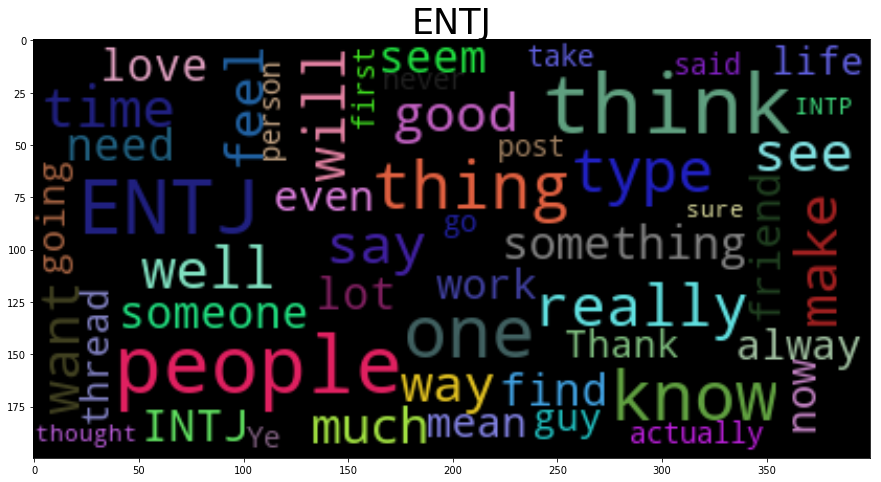

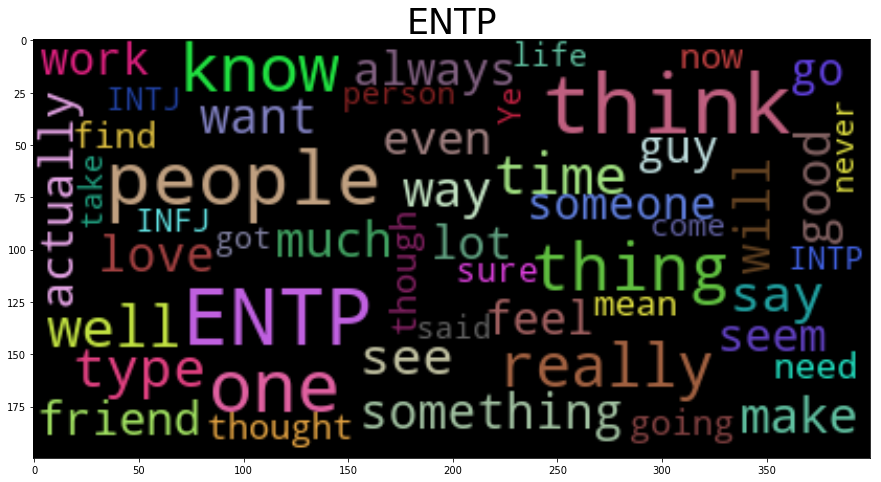

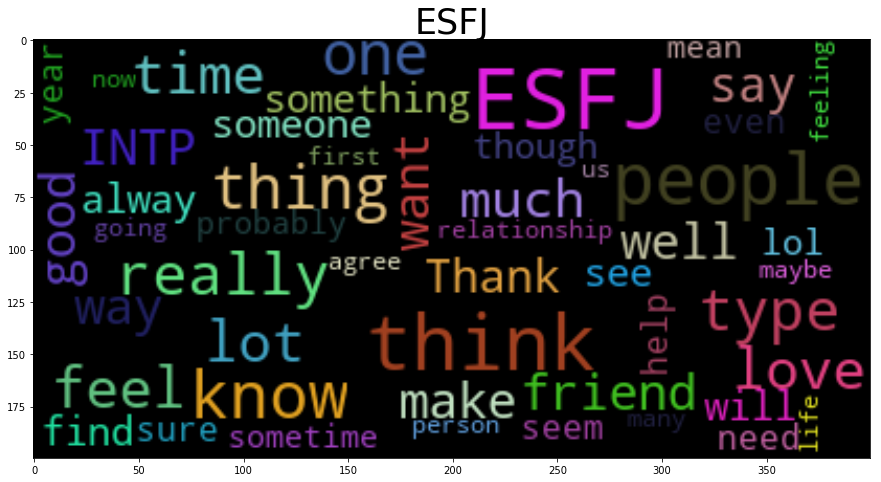

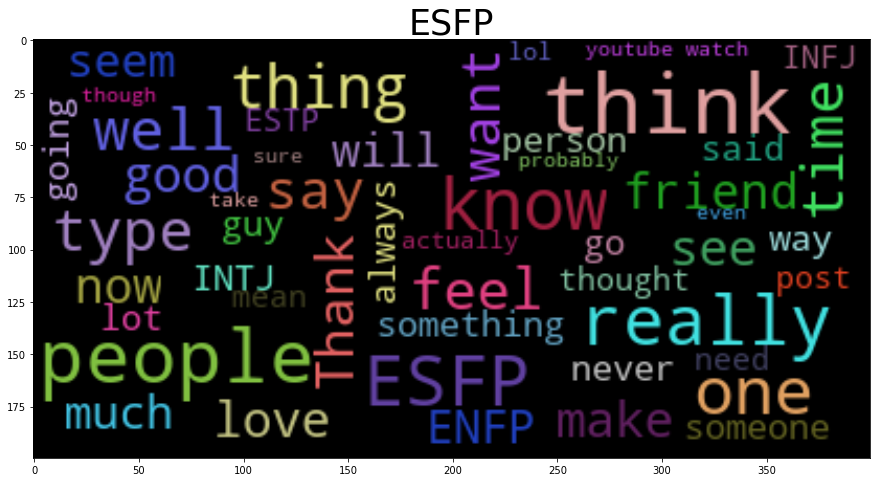

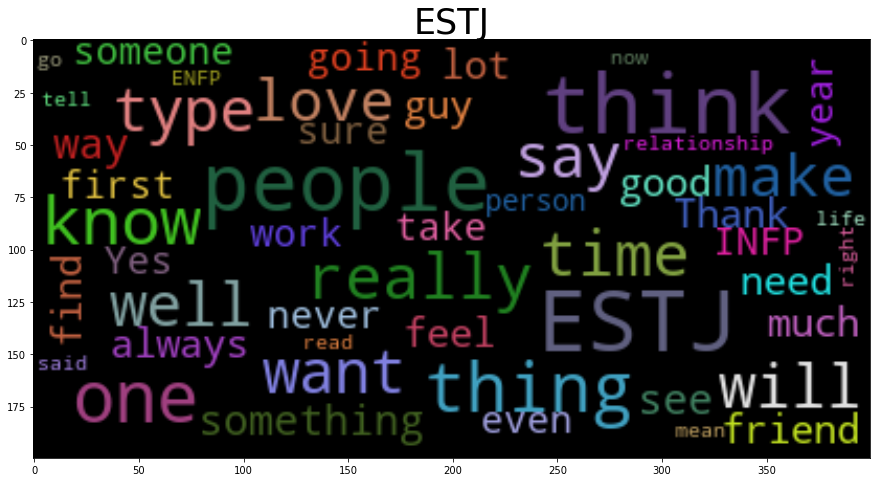

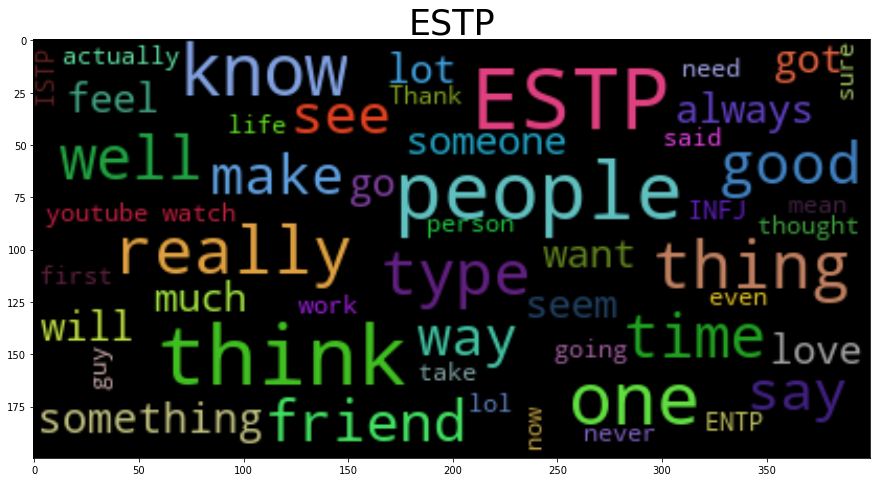

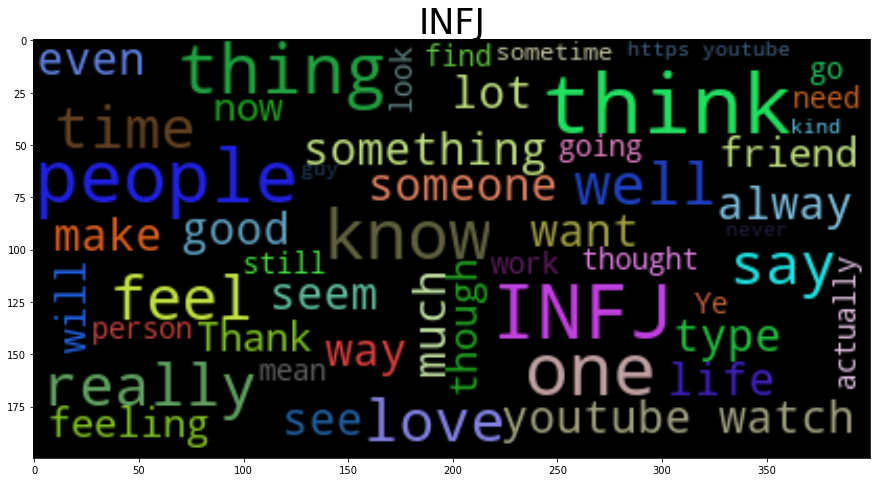

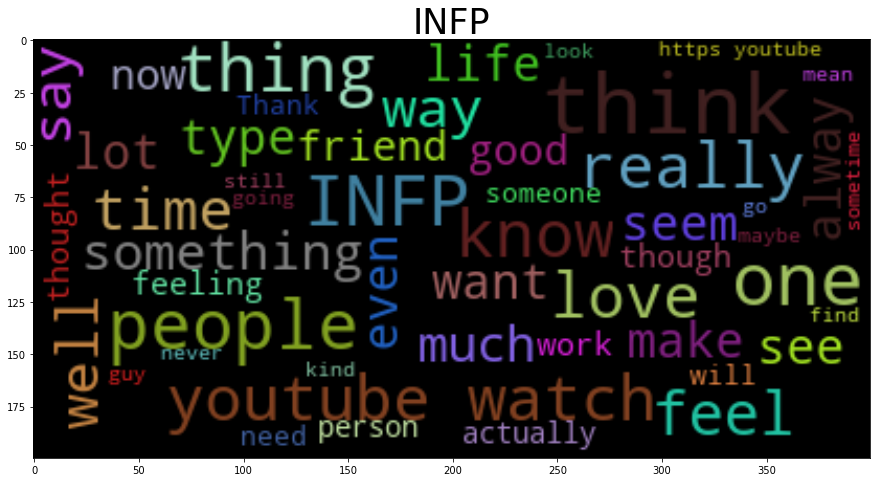

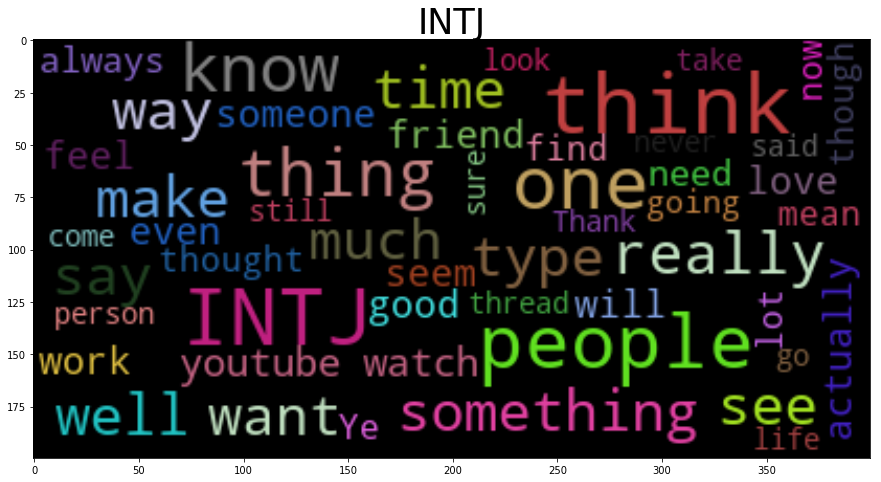

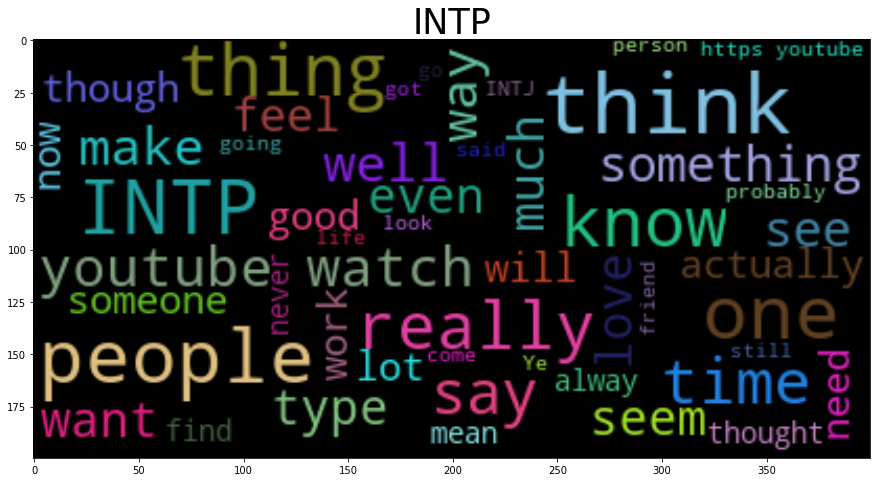

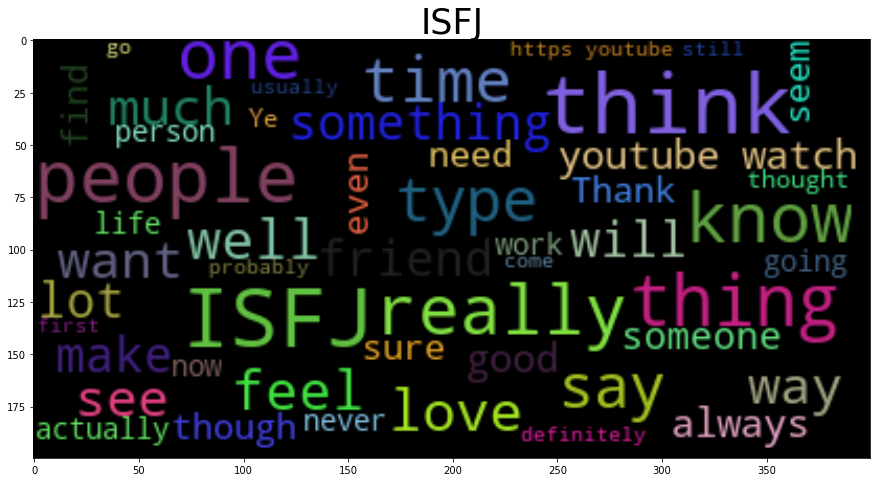

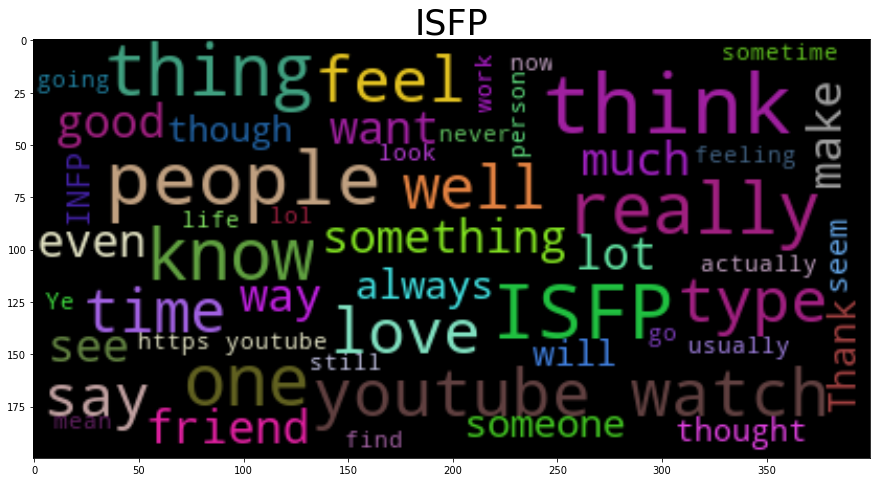

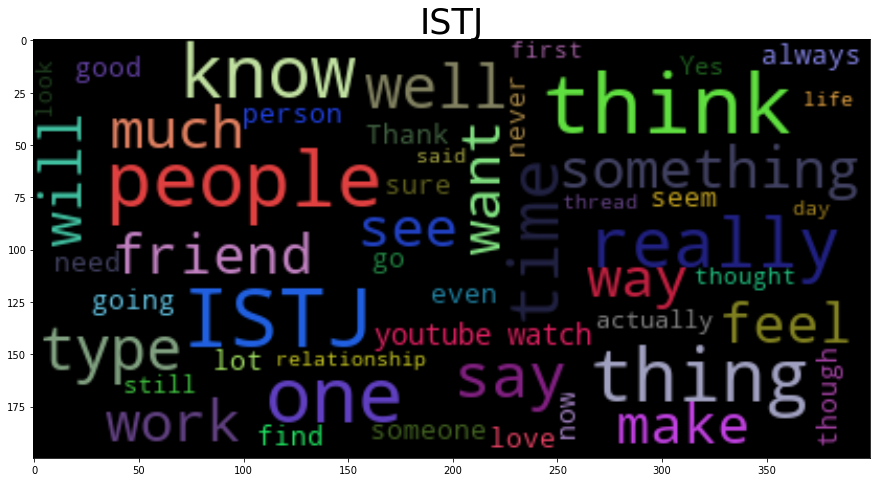

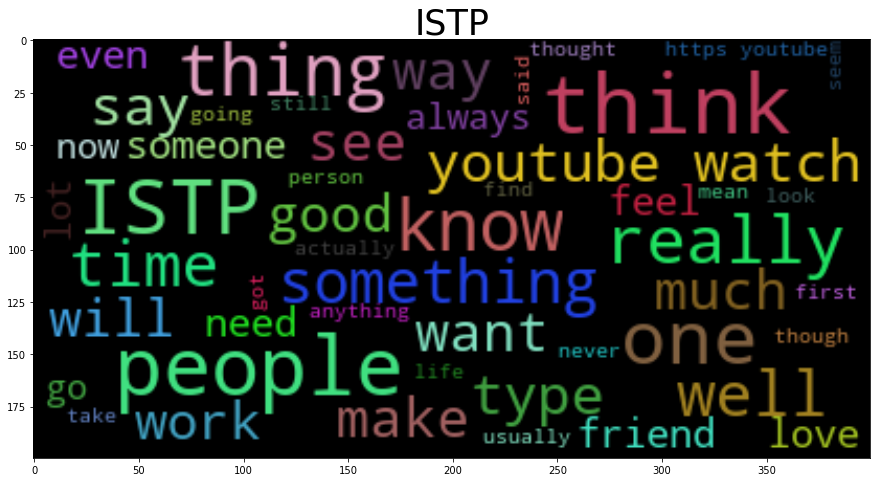

In [157]:
from wordcloud import WordCloud, STOPWORDS
from IPython.core.display import HTML
import random
mbti_types_list = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 
                   'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']

def converttostr(data, seperator):
    result = seperator.join(data)
    return result

def comments_together(row):
    comments = []
    for i in row.split('|||'):
        comment = i.split()
        comments = np.append(comments, comment)
    return comments

stopwords = set(STOPWORDS)


def random_color_func(word, font_size, position, orientation, random_state=None,
                **kwargs):
    levels = range(32,256,32)
    return tuple(random.choice(levels) for _ in range(3))

seperator = ' '
text = ptypes['posts'].apply(lambda x: converttostr(x, seperator))

i = 0

for row in ptypes.iterrows():
    #text = str(list_of_posts.strip('[]'))
    #text = converttostr(list_of_posts, seperator)
    #text = ''.join(text)
    #text = comments_together(text)
    mtype = row[0]
    comment = row[1].apply(lambda x: converttostr(x, seperator))
    #comment = comment.appl0(lambda x: ' '.join(x))
    comment = ' '.join(comment)
    #print("row: ", comment)
    wc = WordCloud(max_words=50, stopwords=stopwords, max_font_size=40, random_state=1)
    # generate word cloud
    wc.generate(comment)
    default_colors = wc.to_array()
    plt.figure(figsize=(15,10))
    plt.title(mbti_types_list[i], fontsize=35)
    i += 1
    plt.imshow(wc.recolor(color_func=random_color_func, random_state=3),
               interpolation="bilinear")

    
    
    

### Type Indicators
The type indicators are classified by:
- Introversion (I) – Extroversion (E)
- Intuition (N) – Sensing (S)
- Thinking (T) – Feeling (F)
- Judging (J) – Perceiving (P)

In [158]:
def types(row):
    t = row['type']
    
    #set IE,  NS, TF, JP to be 0
    IE = 0;
    NS = 0;
    TF = 0;
    JP = 0;
    
    #check if the first letter of the type is I or E
    # if I set to 1 and E to 0
    if t[0] == 'I':
        IE = 0
    elif t[0] == 'E':
        IE = 1
    else:
        print('IE error')
        
    # check if the second letter is N or S, if N set to 1 and S set to 0
    if t[1] == 'N':
        NS = 0
    elif t[1] == 'S':
        NS = 1
    else:
        print('NS error')
        
    # check if the thrid letter is T of F, if T set to 1 and F to 0
    if t[2] == 'T':
        TF = 0
    elif t[2]  == 'F':
        TF = 1
    else:
        print('TF error')
        
    # check if the last letter is J or P
    if t[3]  ==  'J':
        JP = 0
    elif t[3] == 'P':
        JP = 1
    else:
        print('JP error')
        
    return pd.Series({'IE':IE, 'NS':NS, 'TF':TF, 'JP':JP})
    

In [159]:
data = data.join(data.apply(lambda row: types(row), axis=1))
data.head()

type                                              posts  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
1  ENTP  'I'm finding the lack of me in these posts ver...   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   
4  ENTJ  'You're fired.|||That's another silly misconce...   

   number of words per user  average number of words per comment  IE  JP  NS  \
0                     605.0                                11.12   0   0   0   
1                    1219.0                                23.40   1   1   0   
2                     885.0                                16.72   0   1   0   
3                    1113.0                                21.28   0   0   0   
4                    1016.0                                19.34   1   0   0   

   TF  
0   1  
1   0  
2   0  
3   0  
4   0

In [160]:
#show  the ratios of 0's to 1's
print("Introvert - Extrovert: \t", data['IE'].value_counts()[0],"-",data['IE'].value_counts()[1])
print("Intuition - Sensing: \t", data['NS'].value_counts()[0],"-",data['NS'].value_counts()[1])
print("Thinking - Feeling: \t", data['TF'].value_counts()[0],"-",data['TF'].value_counts()[1])
print("Judging - Percieving: \t", data['JP'].value_counts()[0],"-",data['JP'].value_counts()[1])

Introvert - Extrovert: 	 6676 - 1999
Intuition - Sensing: 	 7478 - 1197
Thinking - Feeling: 	 3981 - 4694
Judging - Percieving: 	 3434 - 5241


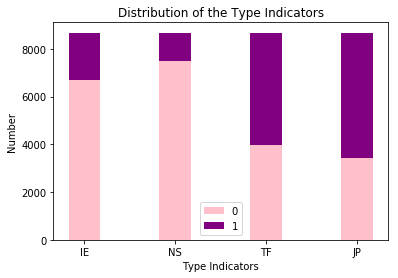

In [161]:
#show the distribution got each
N = 4
zeros = (data['IE'].value_counts()[0], data['NS'].value_counts()[0], data['TF'].value_counts()[0], data['JP'].value_counts()[0])
ones = (data['IE'].value_counts()[1], data['NS'].value_counts()[1], data['TF'].value_counts()[1], data['JP'].value_counts()[1])
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, zeros, width, color='pink')
p2 = plt.bar(ind, ones, width,
             bottom=zeros, color='purple')

plt.ylabel('Number')
plt.xlabel('Type Indicators')
plt.title('Distribution of the Type Indicators')
plt.xticks(ind, ('IE', 'NS', 'TF', 'JP'))
plt.legend((p1[0], p2[0]), ('0', '1'))

plt.show()

Note that I is 0 and E is 1, N is 0 and S is 1, T is 0 and F is 1, and J is 0 and P is 1.

There is a very clear uneven distribution of the type indicators, with a larger number of users having the personality type indicators, I, N, F, and P.

### Person Feature Correlation

In [162]:
corr = data[['IE','NS','TF','JP']].corr()
corr

IE        NS        TF        JP
IE  1.000000 -0.045899 -0.069573  0.161939
NS -0.045899  1.000000 -0.080954  0.014922
TF -0.069573 -0.080954  1.000000 -0.004673
JP  0.161939  0.014922 -0.004673  1.000000

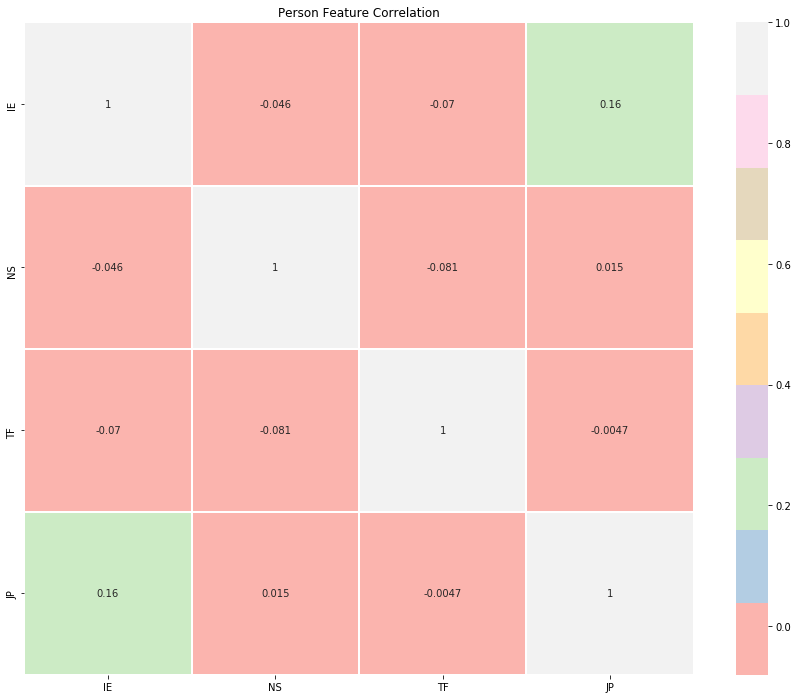

In [163]:
cmap = plt.cm.Pastel1
plt.figure(figsize=(15,12))
plt.title("Person Feature Correlation")
sns.heatmap(corr, cmap=cmap,  annot=True, linewidths=1)

## Preprocessing Posts
- make everything lowercase
- remove urls and punctuation
- keeping only words
- lemmatize the words

But before we can fully preprocess the data, we also have to prep the data which includes translaiting the MBTI personality types to binarry vectors


In [164]:
## set all MBTI letters to correspond to 0 and 1s
mbtipersonalities = {'I':0, 'E':1, 'N':0, 'S':1, 'T':0, 'F':1, 'J':0, 'P':1}
## format of MBTI perdonality types
mbtip_list = [{0:'I', 1:'E'}, {0:'N', 1:'E'}, {0:'T', 1:'F'}, {0:'J', 1:'P'}]

## make mbti personalities to binary vectors
def mbti_to_bin_vec(mbti_pers):
    return [mbtipersonalities[i] for i in mbti_pers]

## change back from binary vectors to the mbti personalities
def bin_vec_to_mbti(mbti_pers):
    ## needs to be a string
    s = ""
    for i, j in enumerate(mbti_pers):
        s += mbtip_list[i][j]
    return s

check = data.head(10)
mbti_binvec  = np.array([mbti_to_bin_vec(i) for i in check.type])
print("Binarized MBTI list:\n%s"% mbti_binvec)

binvec_mbti = np.array([bin_vec_to_mbti(i) for i in mbti_binvec])
print("Back to MBTI:  \n%s" % binvec_mbti)

##check with og data.head
print("Original MBTI: \n%s" % data.head(10).type)

Binarized MBTI list:
[[0 0 1 0]
 [1 0 0 1]
 [0 0 0 1]
 [0 0 0 0]
 [1 0 0 0]
 [0 0 0 0]
 [0 0 1 0]
 [0 0 0 0]
 [0 0 1 0]
 [0 0 0 1]]
Back to MBTI:  
['INFJ' 'ENTP' 'INTP' 'INTJ' 'ENTJ' 'INTJ' 'INFJ' 'INTJ' 'INFJ' 'INTP']
Original MBTI: 
0    INFJ
1    ENTP
2    INTP
3    INTJ
4    ENTJ
5    INTJ
6    INFJ
7    INTJ
8    INFJ
9    INTP
Name: type, dtype: object


In [165]:
data.head()

type                                              posts  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
1  ENTP  'I'm finding the lack of me in these posts ver...   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   
4  ENTJ  'You're fired.|||That's another silly misconce...   

   number of words per user  average number of words per comment  IE  JP  NS  \
0                     605.0                                11.12   0   0   0   
1                    1219.0                                23.40   1   1   0   
2                     885.0                                16.72   0   1   0   
3                    1113.0                                21.28   0   0   0   
4                    1016.0                                19.34   1   0   0   

   TF  
0   1  
1   0  
2   0  
3   0  
4   0

In [166]:
# to preprocss the data we have to make everything lowercase, remove
# nonalphabetic words, urls and overly common words (e.g. a, the, at, etc.)
# and lemmatice the words

### ADD REMOVEING STOPPWORDS and mbti types
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
import re

## list of mbti types
mbti_types_list = ['ESTP', 'ESFP', 'ENFP', 'ENTP', 'ESTJ', 'ESFJ', 'ENFJ', 'ENTJ',
                  'ISTJ', 'ISFJ', 'INFJ', 'INTJ', 'ISTP', 'ISFP', 'INFP', 'INTP']
mbti_types_list = [i.lower() for i in mbti_types_list]

##choose stopwords
stopWOrds = stopwords.words("english")

lemmatizer = WordNetLemmatizer()

def preprocessing(data, remove_mbti=True, remove_stopwords=True):
    personalities = []
    posts = []
    datalength = len(data)
    i = 0
    
    ## iterate through the rows 
    for row in data.iterrows():
        i += 1
        if (i % 500 == 0 or i ==1 or i == datalength):
            print("%s of %s rows" % (i, datalength))
        
        ## go through current row
        comments = row[1].posts
        ## remove urls, after % is ascii charcters so 2 bits
        removeurls = re.sub('(http|https|ftp)://(?:[A-Za-z]|[0-9]|[$-_&@+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', comments)
        ## remove non words
        removenonwords = re.sub('[^A-Za-z]', ' ', removeurls)
        removeextraspace = re.sub('  +',' ', removenonwords)
        ## make lowercase 
        changed = removeextraspace.lower()
        
        #lemmatize basedoff of includiong stopwords or not 
        if remove_stopwords:
            changed = " ".join([lemmatizer.lemmatize(w) for w in changed.split(' ') if w not in stopWOrds])
        else:
            ## lemmatize
            changed = " ".join([lemmatizer.lemmatize(w) for w in changed.split(' ')])
        
        ## remove mbti types
        if remove_mbti:
            for m in mbti_types_list:
                changed = changed.replace(m,"")
                
        ## make mbti typesbinary vectors
        bin_vecs = mbti_to_bin_vec(row[1].type)
        personalities.append(bin_vecs)
        posts.append(changed)
        
    posts = np.array(posts)
    personalities = np.array(personalities)
    return posts, personalities
        

In [167]:
posts, personalities = preprocessing(data)

1 of 8675 rows
500 of 8675 rows
1000 of 8675 rows
1500 of 8675 rows
2000 of 8675 rows
2500 of 8675 rows
3000 of 8675 rows
3500 of 8675 rows
4000 of 8675 rows
4500 of 8675 rows
5000 of 8675 rows
5500 of 8675 rows
6000 of 8675 rows
6500 of 8675 rows
7000 of 8675 rows
7500 of 8675 rows
8000 of 8675 rows
8500 of 8675 rows
8675 of 8675 rows


In [168]:
print("Numer of Posts and Personalities: ", posts.shape, personalities.shape)

Numer of Posts and Personalities:  (8675,) (8675, 4)


In [169]:
posts[0]

'   moment sportscenter top ten play prank life changing experience life repeat today may perc experience immerse last thing  friend posted facebook committing suicide next day rest peace hello  sorry hear distress natural relationship perfection time every moment existence try figure hard time time growth welcome stuff game set match prozac wellbrutin least thirty minute moving leg mean moving sitting desk chair weed moderation maybe try edible healthier alternative basically come three item determined type whichever type want would likely use given type cognitive function whatnot left thing moderation sims indeed video game good one note good one somewhat subjective completely promoting death given sim dear  favorite video game growing current favorite video game cool appears late sad someone everyone wait thought confidence good thing cherish time solitude b c revel within inner world whereas time workin enjoy time worry people always around yo  lady complimentary personality well h

In [170]:
personalities[0]

array([0, 0, 1, 0])

In [171]:
posts

array(['   moment sportscenter top ten play prank life changing experience life repeat today may perc experience immerse last thing  friend posted facebook committing suicide next day rest peace hello  sorry hear distress natural relationship perfection time every moment existence try figure hard time time growth welcome stuff game set match prozac wellbrutin least thirty minute moving leg mean moving sitting desk chair weed moderation maybe try edible healthier alternative basically come three item determined type whichever type want would likely use given type cognitive function whatnot left thing moderation sims indeed video game good one note good one somewhat subjective completely promoting death given sim dear  favorite video game growing current favorite video game cool appears late sad someone everyone wait thought confidence good thing cherish time solitude b c revel within inner world whereas time workin enjoy time worry people always around yo  lady complimentary personality

In [172]:
lines = len(posts)

### Word Clouds

Now that we have preprocessed the data we created a word cloud of that data to show the most commonly used words.

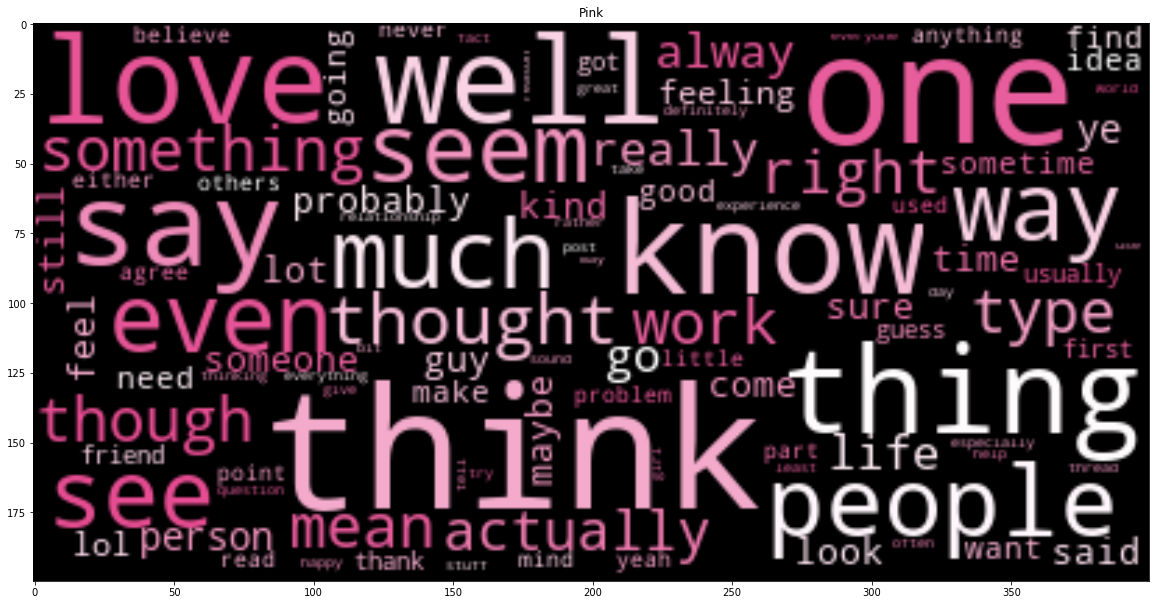

In [173]:
from wordcloud import WordCloud, STOPWORDS
from IPython.core.display import HTML
import random
 
#only one news article here
#texts=['']

#for i in len(posts):
    
text = ''.join(posts)

stopwords = set(STOPWORDS)

def pink_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(333, 75%%, %d%%)" % random.randint(60, 100)


wc = WordCloud(max_words=100, stopwords=stopwords, max_font_size=60, random_state=1)
# generate word cloud
wc.generate(text)
 

default_colors = wc.to_array()
plt.figure(figsize=(20,20))
plt.title("Pink")
plt.imshow(wc.recolor(color_func=pink_color_func, random_state=3),
           interpolation="bilinear")


In [174]:
### figure out how to split thecomments by mbti type nd make word clouds for each

### TF-IDF
tf-idf stands for "Term Frequency - Inverse Document Frequency"
It is a weight associated with a word in the document and corpus to show it's importance.


It is calculated by getting the Term Frequency (tf), which is the frequency of a word in the document:
$$tf_{(t,d})=\displaystyle{\frac{\mbox{count of $t$ in $d$}}{\mbox{number of words in $d$}}},$$ where $t$ stands for the term being looked at  and $d$ stands for the document.

Next the Inverse Document Frequency is caluclated, first by getting the document frequency. The document freuency counts the number of occurences of the word in the set of documents.  It caluclates the importance of a document in the corpus it belongs to:
$$df_t = \mbox{occurrence of $t$ in documents},$$  where $t$  stands for the word being looked at.

The Inverse Document Frequency is then calculated to the importance and weight of the term, the rarer the word the higher the IDF score:
$$idf_t = \frac{N}{df_t},$$
where $t$ stands for the word being looke at and $N$ stands for the total number of documents in the collection.

To avoid the rapid growth of the IDF depending on the size of the corpus of documents we take the log of the idf and to avoid dividing by $0$ add $1$ to the denomiator:
$$idf_t = \log\left(\frac{N}{df_{t} + 1}\right),$$
where $t$ stands for the term being looked at and $N$ stands for the total number of documents in the corpus.

To find the tf-idf  value of word $t$ in document $d$:
$$\mbox{tf-idf}_{(t,d)} = tf_{t,d)} * \log\left(\frac{N}{df_{t} + 1}\right).$$

Note: there does not seem to be a general consensus on the capitalization of tf-idf



In [175]:
def computeTF(term, document):
    tf = {}
    docCount = len(document)
    for word, count in term.items():
        tft[word] = count / float(docCount)
    return tf


    
def computeIDF(documents):
    import math
    N = len(documents)
    idf = dict.fromkeys(documents[0].keys(), 0)
    for doc in documents:
        for word, val in doc.items():
            if val > 0:
                idf[word] += 1
    for word, val in idf.items():
        idf[word] = math.log(N / (float(val) + 1))
    return idf



def computeTFIDF(tf, idf):
    tfidf = {}
    for word, val in tf.items():
        tfidf[word] = val * idf[word]
    return tfidf

Although we started by calculating the tf-idf step by step, we realized that there existed packages to simplify calculating the tf-idf

#### Vectorizing using count and tf-idf
- we want to keep words that appear in 10%-90% of posts

To caluclate the tf-idf we first need to use the CountVectorizer to convert a collection of text documents to a matrix of token counts. 
We set max_df to 0.9 and min_df to 0.1 to get the words that appear in 10% to 90% of the posts.
Then we can transform the count matrix to td-idf representation using TfidfTransformer

In [176]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE



count_vec = CountVectorizer(stop_words="english",
                            analyzer = "word",
                            ngram_range=(1,1),
                            max_df=0.9,
                            min_df=0.1,
                            max_features=None)


count_train = count_vec.fit(posts)
print("CountVectorizer...")
# should create and return a count-vectorized output of docs
posts_count = count_vec.fit_transform(posts)


tfidf_izer = TfidfTransformer()

print("tf-idf...")
posts_tfidf =  tfidf_izer.fit_transform(posts_count).toarray()                           
                             
#vectorizer = TfidfVectorizer()
#vectors = vectorizer.fit_transform([documentA, documentB])
#feature_names = vectorizer.get_feature_names()
#dense = vectors.todense()
#denselist = dense.tolist()
#df = pd.DataFrame(denselist, columns=feature_names)

CountVectorizer...
tf-idf...


In [177]:
#list every feature that was kept by CountVectorizer
print("Every feature:\n{}".format(count_vec.get_feature_names()))

Every feature:
['ability', 'able', 'absolutely', 'accept', 'accurate', 'act', 'action', 'actual', 'actually', 'add', 'admit', 'advice', 'afraid', 'age', 'ago', 'agree', 'ah', 'amazing', 'angry', 'animal', 'annoying', 'answer', 'anxiety', 'anymore', 'apparently', 'appreciate', 'approach', 'area', 'argument', 'art', 'ask', 'asked', 'asking', 'aspect', 'assume', 'attention', 'attracted', 'avatar', 'avoid', 'aware', 'away', 'awesome', 'awkward', 'baby', 'bad', 'based', 'basically', 'beautiful', 'bed', 'behavior', 'belief', 'believe', 'best', 'better', 'big', 'bit', 'black', 'blue', 'body', 'book', 'bored', 'boring', 'born', 'bother', 'boy', 'boyfriend', 'brain', 'break', 'bring', 'brother', 'buy', 'called', 'came', 'car', 'care', 'career', 'case', 'cat', 'cause', 'certain', 'certainly', 'chance', 'change', 'changed', 'character', 'check', 'child', 'choice', 'choose', 'class', 'clear', 'clearly', 'close', 'cognitive', 'cold', 'college', 'color', 'come', 'comfortable', 'coming', 'comment', '

In [178]:
# numbered list of the features kept by the CountVectorizer
features = list(enumerate(count_vec.get_feature_names()))
features

[(0, 'ability'),
 (1, 'able'),
 (2, 'absolutely'),
 (3, 'accept'),
 (4, 'accurate'),
 (5, 'act'),
 (6, 'action'),
 (7, 'actual'),
 (8, 'actually'),
 (9, 'add'),
 (10, 'admit'),
 (11, 'advice'),
 (12, 'afraid'),
 (13, 'age'),
 (14, 'ago'),
 (15, 'agree'),
 (16, 'ah'),
 (17, 'amazing'),
 (18, 'angry'),
 (19, 'animal'),
 (20, 'annoying'),
 (21, 'answer'),
 (22, 'anxiety'),
 (23, 'anymore'),
 (24, 'apparently'),
 (25, 'appreciate'),
 (26, 'approach'),
 (27, 'area'),
 (28, 'argument'),
 (29, 'art'),
 (30, 'ask'),
 (31, 'asked'),
 (32, 'asking'),
 (33, 'aspect'),
 (34, 'assume'),
 (35, 'attention'),
 (36, 'attracted'),
 (37, 'avatar'),
 (38, 'avoid'),
 (39, 'aware'),
 (40, 'away'),
 (41, 'awesome'),
 (42, 'awkward'),
 (43, 'baby'),
 (44, 'bad'),
 (45, 'based'),
 (46, 'basically'),
 (47, 'beautiful'),
 (48, 'bed'),
 (49, 'behavior'),
 (50, 'belief'),
 (51, 'believe'),
 (52, 'best'),
 (53, 'better'),
 (54, 'big'),
 (55, 'bit'),
 (56, 'black'),
 (57, 'blue'),
 (58, 'body'),
 (59, 'book'),
 (60,

In [179]:
posts_tfidf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.05014994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14931006, 0.05413523, 0.13028438, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06914728, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03973842, 0.        , ..., 0.        , 0.05344108,
        0.        ]])

In [180]:
posts_tfidf.shape

(8675, 719)

### Train XGBoost Classifiers
Now we can move on to training the XGBoost classifiers.
XGBoost stands for eXtreme Gradient Boosting, which is an implementation of gradient boosted decision trees that is designed for performance and speed. It is used for it's fast execution speed and to model performance.

We will want to train two sets of data, X and Y, where
- X is the posts in their tf-idf representation (posts_tfidf), and
- Y is the binarized MBTI

In [181]:
print("X: posts in tf-idf representation \n")
print("first row of X:\n %s" % posts_tfidf[0])

X: posts in tf-idf representation 

first row of X:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.08218642 0.06980062 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.10558194 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.11225567 0.         0.         0.08832112 0.
 0.10719059 0.         0.         0.         0.         0.05302722
 0.0697446  0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.1675766
 0.         0.10923411 0.         0.10094257 0.

In [182]:
# the MBTI type indicators
mbti_type_ind = ["IE: Introversion (I) - Extroversion (E)",
                "NS: Intuition (N) - Sensing (S)",
                "FT: Feeling(F) - Thinking (T)",
                "JP: Judging (J) - Percieving (P)"]

for m in range(len(mbti_type_ind)):
    print(mbti_type_ind[m])
    
mbti1row = bin_vec_to_mbti(personalities[0,:])



IE: Introversion (I) - Extroversion (E)
NS: Intuition (N) - Sensing (S)
FT: Feeling(F) - Thinking (T)
JP: Judging (J) - Percieving (P)


In [183]:
print("MBTI of 1st row: %s" % mbti1row)
print("Y: Binarized MBTI, first row of Y: %s" % personalities[0,:])

MBTI of 1st row: INFJ
Y: Binarized MBTI, first row of Y: [0 0 1 0]


### First XGBoost model for out MBTI dataset

In [184]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


X = posts_tfidf

#we need to train each of the mbti type indicators
for m in range(len(mbti_type_ind)):
    print("%s ..." % mbti_type_ind[m])
    
    #for each type indicator we train a different Y
    Y = personalities[:,m]
    
    # next we split the data into train and test sets
    #unsure how to choose the random seed or test size
    seed = 50
    test_size = 0.50
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    #fit model on the training data
    model = XGBClassifier()
    model.fit(X_train, Y_train)
        
    #make predictions for the test data
    Y_prediction = model.predict(X_test)
    predictions = [round(value) for value in Y_prediction]
    
    #check the accuracy
    accuracy = accuracy_score(Y_test, predictions)
    print(" - %s Accuracy: %.2f%%" % (mbti_type_ind[m], accuracy * 100.0))

IE: Introversion (I) - Extroversion (E) ...
 - IE: Introversion (I) - Extroversion (E) Accuracy: 77.41%
NS: Intuition (N) - Sensing (S) ...
 - NS: Intuition (N) - Sensing (S) Accuracy: 86.58%
FT: Feeling(F) - Thinking (T) ...
 - FT: Feeling(F) - Thinking (T) Accuracy: 73.28%
JP: Judging (J) - Percieving (P) ...
 - JP: Judging (J) - Percieving (P) Accuracy: 65.35%


Although the accuracy changes slightly each time we run the model and change the test_size, a  rough estimation of the accuracy values for each MBTI type indicator seems to be:
- IE: 77%
- NS: 86%
- FT: 73%
- JP: 65%

#### Monitoring Training Performance 
We add this to be able to look at the output of each training iteration

In [185]:
#we need to train each of the mbti type indicators
for m in range(len(mbti_type_ind)):
    print("%s ..." % mbti_type_ind[m])
    
    #for each type indicator we train a different Y
    Y = personalities[:,m]
    
    # next we split the data into train and test sets
    #unsure how to choose the random seed or test size
    seed = 50
    test_size = 0.50
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    #fit model on the training data
    model = XGBClassifier()
    #introduce evaluation test set
    eval_set = [(X_test, Y_test)]
    model.fit(X_train, Y_train, eval_metric="error", eval_set=eval_set, verbose=True)
        
    #make predictions for the test data
    Y_prediction = model.predict(X_test)
    predictions = [round(value) for value in Y_prediction]
    
    #check the accuracy
    accuracy = accuracy_score(Y_test, predictions)
    print(" - %s Accuracy: %.2f%%" % (mbti_type_ind[m], accuracy * 100.0))

IE: Introversion (I) - Extroversion (E) ...
[0]	validation_0-error:0.233518
[1]	validation_0-error:0.230982
[2]	validation_0-error:0.227985
[3]	validation_0-error:0.23029
[4]	validation_0-error:0.229368
[5]	validation_0-error:0.229368
[6]	validation_0-error:0.227985
[7]	validation_0-error:0.227985
[8]	validation_0-error:0.228216
[9]	validation_0-error:0.227755
[10]	validation_0-error:0.228677
[11]	validation_0-error:0.228446
[12]	validation_0-error:0.228677
[13]	validation_0-error:0.228907
[14]	validation_0-error:0.229138
[15]	validation_0-error:0.228446
[16]	validation_0-error:0.228677
[17]	validation_0-error:0.228907
[18]	validation_0-error:0.228907
[19]	validation_0-error:0.229138
[20]	validation_0-error:0.228907
[21]	validation_0-error:0.228677
[22]	validation_0-error:0.228677
[23]	validation_0-error:0.228677
[24]	validation_0-error:0.228446
[25]	validation_0-error:0.228446
[26]	validation_0-error:0.228677
[27]	validation_0-error:0.228216
[28]	validation_0-error:0.228677
[29]	valid

[43]	validation_0-error:0.284924
[44]	validation_0-error:0.28308
[45]	validation_0-error:0.282158
[46]	validation_0-error:0.284463
[47]	validation_0-error:0.285616
[48]	validation_0-error:0.28331
[49]	validation_0-error:0.280775
[50]	validation_0-error:0.279622
[51]	validation_0-error:0.279852
[52]	validation_0-error:0.27893
[53]	validation_0-error:0.279391
[54]	validation_0-error:0.279852
[55]	validation_0-error:0.277317
[56]	validation_0-error:0.279391
[57]	validation_0-error:0.279622
[58]	validation_0-error:0.278469
[59]	validation_0-error:0.2787
[60]	validation_0-error:0.278239
[61]	validation_0-error:0.276856
[62]	validation_0-error:0.277086
[63]	validation_0-error:0.276164
[64]	validation_0-error:0.271323
[65]	validation_0-error:0.272706
[66]	validation_0-error:0.273398
[67]	validation_0-error:0.273167
[68]	validation_0-error:0.272706
[69]	validation_0-error:0.272015
[70]	validation_0-error:0.271784
[71]	validation_0-error:0.272476
[72]	validation_0-error:0.270632
[73]	validation

The classification error is returned after every training iteration. Furthermore, we can also notice if we look closely that later in the training the results get slightly worse than in the begining.

### Feature Importance
We next show a plot and list of the feature importance for each inividual indicator.

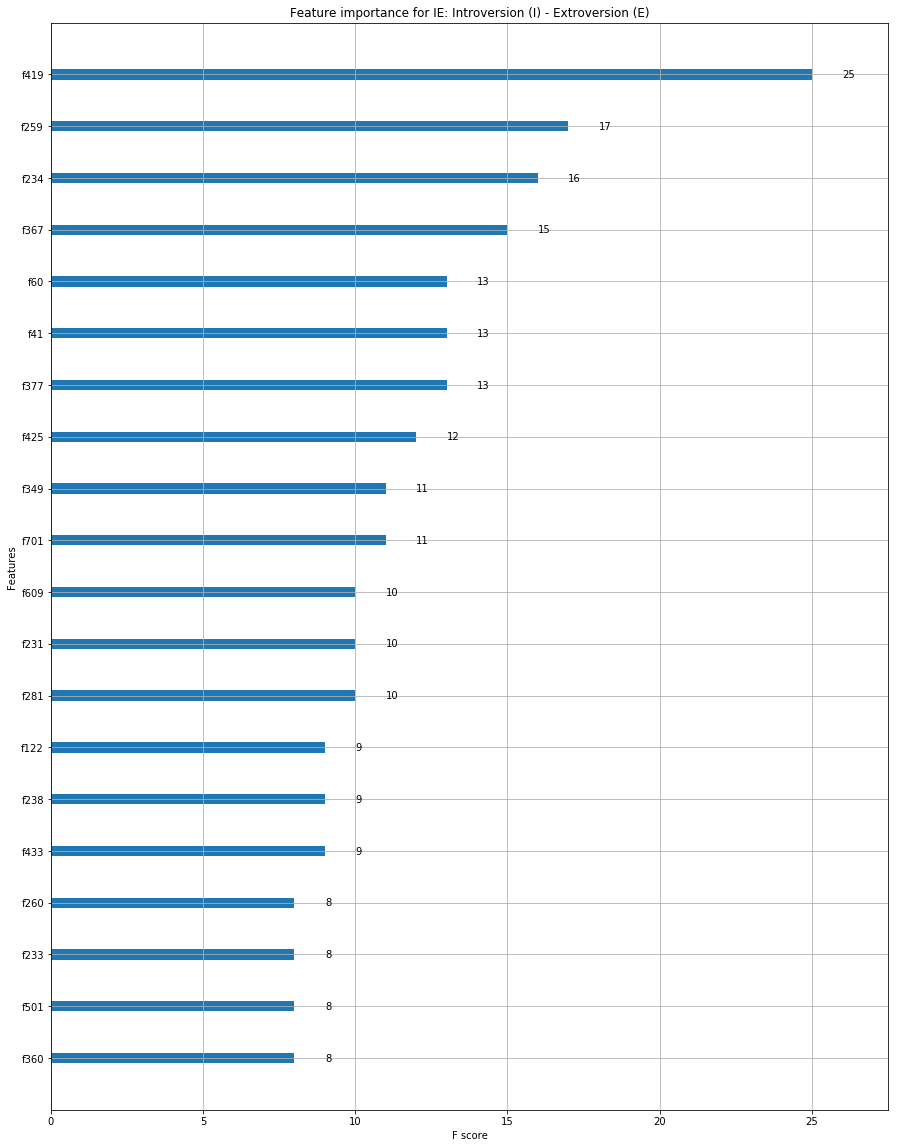

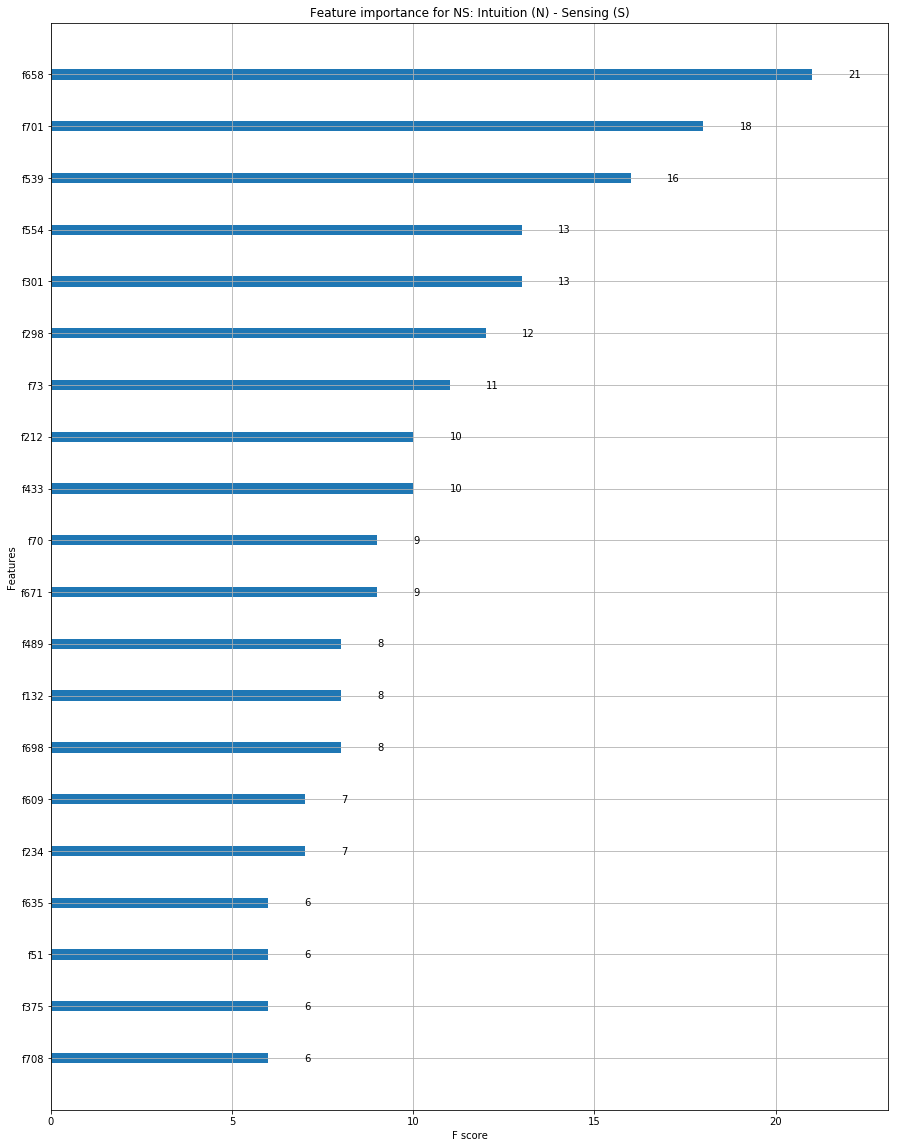

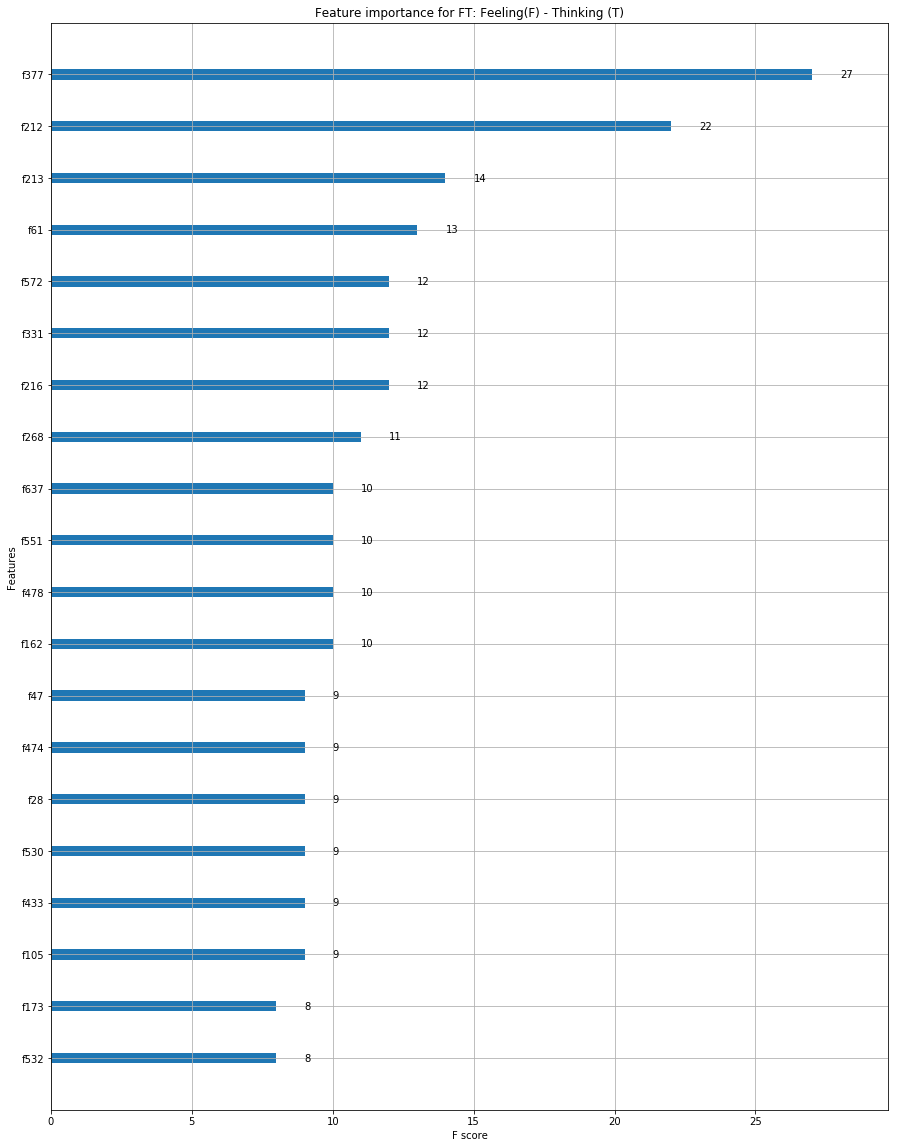

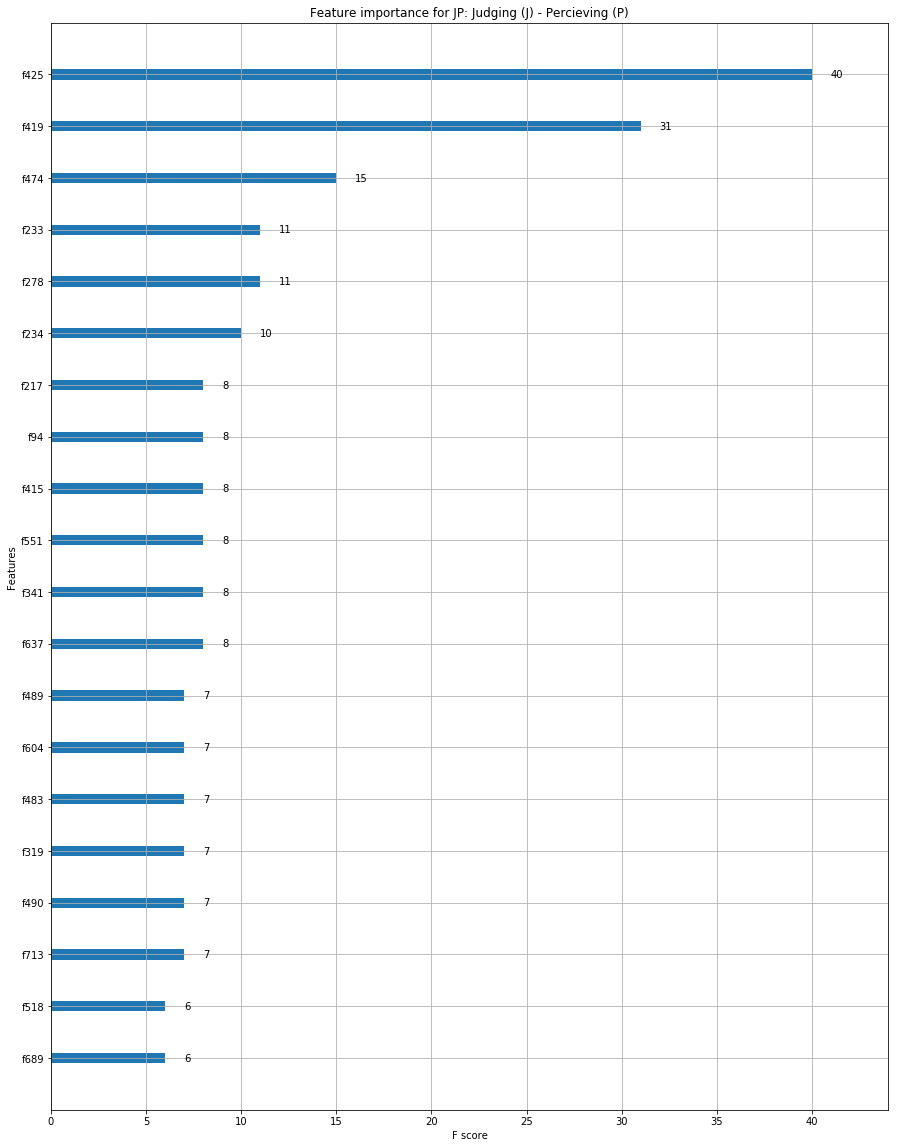

In [186]:
#firstly for the 1st indicator
from xgboost import plot_importance

list_of_colors = ["darkorchid", "darkturquoise", "mediumvioletred", "mediumseagreen"]

i=0
for m in range(len(mbti_type_ind)):
    y = personalities[:,m]
    model = XGBClassifier()
    model.fit(X, y)
    #plot the feature importance
    fi = plot_importance(model, max_num_features=20)
    fig = fi.figure
    fig.set_size_inches(15,20)
    plt.title("Feature importance for %s" % mbti_type_ind[m])
    plt.show()
    

In [187]:
features = sorted(list(enumerate(model.feature_importances_)), key = lambda x: x[1], reverse=True)
for f in features[0:20]:
    print("%d\t%f\t%s" % (f[0], f[1], count_vec.get_feature_names()[f[0]]))
    


425	0.057637	ni
419	0.044669	ne
474	0.021614	plan
233	0.015850	fuck
278	0.015850	help
234	0.014409	fun
94	0.011527	cold
217	0.011527	fi
341	0.011527	lazy
415	0.011527	music
551	0.011527	shit
637	0.011527	ti
319	0.010086	intuition
483	0.010086	post
489	0.010086	pretty
490	0.010086	probably
604	0.010086	stuff
713	0.010086	yeah
99	0.008646	coming
138	0.008646	dear


## Configuring Gradient Boosting

### XGBoost's hyperparameters
XGBoost has a multitude of tuning parameters that are split into three categories:
- General Parameters, which guide the overall functioning
- Booster Parameters, which guide the indiviual boosters at each step
- Learning Task Parameters, which guide the opitmization performed
Not all are important to our project, but we will need to spend some time looking at the tuning parameters to figure out the best ones for out project.

There are too many for us to list all, butt some of the most common ones, and most likely that we will use, are:
- nthread
- seed
- silent
- subsample
- max_delta_step
- missing
- scale_pos_weight
- booster
- gbtree
- max_depth
- n_estimators
- colsample_bytree
- reg_lambda
- colsample_bylevel
- objective
- leaning_rate
- base_score
- min_child_weight
- reg_alpha
- gamma

In [188]:
#some of the xgbparams we may look at 
default_get_xgb_params = model.get_xgb_params()
print(default_get_xgb_params)

{'nthread': 1, 'seed': 0, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1, 'subsample': 1, 'reg_alpha': 0, 'colsample_bylevel': 1, 'reg_lambda': 1, 'min_child_weight': 1, 'scale_pos_weight': 1, 'max_delta_step': 0, 'objective': 'binary:logistic', 'n_estimators': 100, 'missing': None, 'base_score': 0.5, 'silent': 1, 'booster': 'gbtree', 'max_depth': 3}


We will start wuth using the parameters:
- n_estimators: number of trees to build
- max_depth: the maximum. depth of a tree, 
    - the larger the value the more complex the model is and more likely to overfit 
- nthread: the number of parallel threads running XGBoost
- learning_rate (also known as eta): step size shrinkage, in order to prevent overfitting. 

In [189]:
#set up some of the parameters for xgboost
param={}

#good ones to choose initially would be n_estimators, max_depth, n_thread, learning_rate
param['n_estimators']=100
#max_depth default is 6 

param['max_depth']=2
#number of parallel threads running XGBoost
param['nthread']=8
#learning rate default is 0.3
param['learning_rate']=0.2

#training the MBTI type indicators individually
for m in range(len(mbti_type_ind)):
    print("%s ... " % (mbti_type_ind[m]))
    
    Y= personalities[:,m]
    
    #split into train and test sets
    seed = 50
    test_size = 0.50
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    #fit model on the training data
    model = XGBClassifier(**param)
    model.fit(X_train, Y_train)
        
    #make predictions for the test data
    Y_prediction = model.predict(X_test)
    predictions = [round(value) for value in Y_prediction]
    
    #check the accuracy
    accuracy = accuracy_score(Y_test, predictions)
    print(" - %s Accuracy: %.2f%%" % (mbti_type_ind[m], accuracy * 100.0))
    
    

IE: Introversion (I) - Extroversion (E) ... 
 - IE: Introversion (I) - Extroversion (E) Accuracy: 77.78%
NS: Intuition (N) - Sensing (S) ... 
 - NS: Intuition (N) - Sensing (S) Accuracy: 86.68%
FT: Feeling(F) - Thinking (T) ... 
 - FT: Feeling(F) - Thinking (T) Accuracy: 73.44%
JP: Judging (J) - Percieving (P) ... 
 - JP: Judging (J) - Percieving (P) Accuracy: 64.62%


First attempts of parameter tuning did little with the accuracy not improving at all, with the rough estimates of accuracy still being:
- IE: 77%
- NS: 86%
- FT: 73%
- JP: 65%
note: played around with the parameter, including setting n_estimates to 50 instead of 100, which reduced our accuracy by around 1% for each mbti type.

Can also try:
- subsample: ratio of the training istances, reducing means that less is sampled of the training data before growing trees
- colsample_bytree: percentage of features used per tree. The higher it is the more likely it will lead to overfitting
- num_parallel_tree: number of parallel trees constructed during each iteration


#### Playing around with parameters
We are going through testing different parameters to see which result in the best improvement of accuracy.
The accuracy before parameters were added, for test_set=0.5 (one run):
- IE: 77.41%
- NS: 86.58%
- TF: 73.28%
- JP: 65.35%

In [ ]:
param={}


param_list=['n_estimators', 'max_depth', 'nthread', 'learning_rate', 'subsample',
          'colsample_bytree', 'num_parallel_tree', 'num_feature', 'seed',
          'silent', 'max_delta_step', 'scale_pos_weight',
          'reg_lambda', 'colsample_bylevel', 'objective', 
          'base_score', 'min_child_weight', 'reg_alpha', 'gamma']

#previous value was 100
param['n_estimators']=90 #no real change when set to 100

#max_depth default is 6 , was set at 3
param['max_depth']=4  #not a big improvement

#number of parallel threads running XGBoost, was set at 1
param['nthread']=2 #no real change

#learning rate default is 0.3, was set at 0.1
param['learning_rate']=0.2 #slight changes

#default is 1
param['subsample']=0.75 #a bit of change

#default is 1
param['colsample_bytree']= 0.75 #slight changes

#default is 1
param['num_parallel_tree'] = 2 #no real change

#set automatically by XGBoost
param['num_feature']= 25 #no real change

#default 0
param['seed']= 21

#belongs to verbosity?
param['silent']= 2

#default 0
param['max_delta_step']= 2

#set at None
#param['missing']=

#set at 1
param['scale_pos_weight']= 2

#default is gbtree
#param['booster'] = "dgblinear" #no real changes with gblinear or dart

#default is 1
param['reg_lambda']= 2

#default is 1
param['colsample_bylevel']=0.5

#set at "binary:logistoc"
param['objective']= "reg:logistic"

#set at 0.5
param['base_score']= 0.7

#default 1
param['min_child_weight']= 2

#set at 0
param['reg_alpha']= 1

#default is 0
param['gamma']= 1


#go throguh all params

for p in range(len(param_list)):
    params={}  
    params[param_list[p]] = param[param_list[p]]
    print(param_list[p])
    #training the MBTI type indicators individually
    for m in range(len(mbti_type_ind)):
        print("%s ... " % (mbti_type_ind[m]))

        Y= personalities[:,m]

        #split into train and test sets
        seed = 50
        test_size = 0.50

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

        #fit model on the training data
        model = XGBClassifier(**params)
        model.fit(X_train, Y_train)

        #make predictions for the test data
        Y_prediction = model.predict(X_test)
        predictions = [round(value) for value in Y_prediction]

        #check the accuracy
        accuracy = accuracy_score(Y_test, predictions)
        print(" - %s Accuracy: %.2f%%" % (mbti_type_ind[m], accuracy * 100.0))



n_estimators
IE: Introversion (I) - Extroversion (E) ... 
 - IE: Introversion (I) - Extroversion (E) Accuracy: 77.57%
NS: Intuition (N) - Sensing (S) ... 
 - NS: Intuition (N) - Sensing (S) Accuracy: 86.63%
FT: Feeling(F) - Thinking (T) ... 
 - FT: Feeling(F) - Thinking (T) Accuracy: 73.08%
JP: Judging (J) - Percieving (P) ... 
 - JP: Judging (J) - Percieving (P) Accuracy: 65.31%
max_depth
IE: Introversion (I) - Extroversion (E) ... 
 - IE: Introversion (I) - Extroversion (E) Accuracy: 77.57%
NS: Intuition (N) - Sensing (S) ... 
 - NS: Intuition (N) - Sensing (S) Accuracy: 86.49%
FT: Feeling(F) - Thinking (T) ... 
 - FT: Feeling(F) - Thinking (T) Accuracy: 73.72%
JP: Judging (J) - Percieving (P) ... 
 - JP: Judging (J) - Percieving (P) Accuracy: 65.21%
nthread
IE: Introversion (I) - Extroversion (E) ... 
 - IE: Introversion (I) - Extroversion (E) Accuracy: 77.41%
NS: Intuition (N) - Sensing (S) ... 
 - NS: Intuition (N) - Sensing (S) Accuracy: 86.58%
FT: Feeling(F) - Thinking (T) ... 


To figure out the best hyperparameters to use and their best values we created a seperate notebook (xgboostparams.ipynb) that loops through allofthe possible parameters listed for this data, and looping through different possible values. However, we saw very little improvement for each value. The best parameter settings for improving the accuracy values where chosen and used below.

In [ ]:
param={}

param['booster']='gbtree'
param['objective']='binary:logistic'
param['n_estimators']=250
param['learning_rate']=0.2 #or 0.1
param['base_score']=0.1 #or 0.9
param['subsample']=0.6
param['colsample_bytree']=0.8
param['colsample_bylevel']=0.2
param['gamma']=6



#training the MBTI type indicators individually
for m in range(len(mbti_type_ind)):
    print("%s ... " % (mbti_type_ind[m]))
    
    Y= personalities[:,m]
    
    #split into train and test sets
    seed = 50
    test_size = 0.50
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    #fit model on the training data
    model = XGBClassifier(**param)
    model.fit(X_train, Y_train)
        
    #make predictions for the test data
    Y_prediction = model.predict(X_test)
    predictions = [round(value) for value in Y_prediction]
    
    #check the accuracy
    accuracy = accuracy_score(Y_test, predictions)
    print(" - %s Accuracy: %.2f%%" % (mbti_type_ind[m], accuracy * 100.0))
    

However, here we see a decrease in the accuracy values, with the results of:
- IE: 76.16%
- NS: 85.17%
- FT: 73.79%
- JP: 62.45%

So the initial attempts of adding parameters, before going through each individual value, were actually more accurate.

In [ ]:
#set up some of the parameters for xgboost
param={}

#good ones to choose initially would be n_estimators, max_depth, n_thread, learning_rate
param['n_estimators']=100
#max_depth default is 6 

param['max_depth']=2
#number of parallel threads running XGBoost
param['nthread']=8
#learning rate default is 0.3
param['learning_rate']=0.1

param['base_score']=0.9 #or 0.9
param['subsample']=0.6
param['colsample_bytree']=0.8
param['colsample_bylevel']=0.25
param['gamma']=10

#training the MBTI type indicators individually
for m in range(len(mbti_type_ind)):
    print("%s ... " % (mbti_type_ind[m]))
    
    Y= personalities[:,m]
    
    #split into train and test sets
    seed = 50
    test_size = 0.50
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    #fit model on the training data
    model = XGBClassifier(**param)
    model.fit(X_train, Y_train)
        
    #make predictions for the test data
    Y_prediction = model.predict(X_test)
    predictions = [round(value) for value in Y_prediction]
    
    #check the accuracy
    accuracy = accuracy_score(Y_test, predictions)
    print(" - %s Accuracy: %.2f%%" % (mbti_type_ind[m], accuracy * 100.0))
    

For some reason we are unable to greatly increase the accuracy scores, no matter how much we tune the parameters. After spending multiple days on figuring out the best parameters we are only able to change the accuracy:
- IE: 77.78% -> 77.48%
- NS: 86.86% -> 86.63%
- FT: 73.44% -> 74.09%
- JP: 64.62% -> 65.95%


## Prediciting our own MBTI Types
Now that we have done all of this we can use out own social media posts to attept to predict our MBTI types.

In order to do this we will have to:
1. Prep data
2. Fit and predict the type indicators
3. Show result

prep data

In [ ]:
kaya = pd.read_csv('/users/kdeuser/Desktop/CMPU366/FinalProject/kaya.csv') 
kaya.head()

In [ ]:
#dummy for the data prep function to be reused
#kaya_data = pd.DataFrame(data={'type':['ENFP'], 'posts':[kaya]})

kaya.join(kaya.apply(lambda row: types(row), axis=1))

kaya, dummy = preprocessing(kaya)

kaya_X_count = count_vec.transform(kaya)
kaya_X_tfidf = tfidf_izer.transform(kaya_X_count).toarray()


fit and predict the type indicators

In [ ]:
#with the parameters chosen for XGBoost
param={}

param['booster']='gbtree'
param['objective']='binary:logistic'
param['n_estimators']=250
param['learning_rate']=0.2 #or 0.1
param['base_score']=0.1 #or 0.9
param['subsample']=0.6
param['colsample_bytree']=0.8
param['colsample_bylevel']=0.2
param['gamma']=6

#same X?
result=[]
#training the MBTI type indicators individually
for m in range(len(mbti_type_ind)):
    print("%s ... " % (mbti_type_ind[m]))
    
    Y= personalities[:,m]
    
    #split into train and test sets
    seed = 50
    test_size = 0.50
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    #fit model on the training data
    model = XGBClassifier(**param)
    model.fit(X_train, Y_train)
        
    #make predictions for the test data
    Y_prediction = model.predict(kaya_X_tfidf)
    result.append(Y_prediction[0])
    

    #print(" %s prediction: %s" % (mbti_type_ind[m], Y_prediction))
    

Print result

In [ ]:
print('Your MBTI type based off of you last 50 posts is:', bin_vec_to_mbti(result))

The MBTI type predicted for me, INFP, is actually quite close to the actual MBTI type, ENFP. Only predicting me to be introverted rather than extroverted. Which is likely due to the larger amout of Introverted types having data in the dataset we looked at.

#### Additional tests

We considered going to the personality cafe forums to look at the past 50 posts of a user and testing our model on them, as it is where the dataset we used was gathered. However, the website is currently limited in options as it is undergoing matinence currently. So instead we looked at reddit. We looked at the past 50 comments/posts of users active in the r/mbti subreddit. 

Taken from u/Roaming_Dinosaur

In [ ]:
roamd = pd.read_csv('/users/kdeuser/Desktop/CMPU366/FinalProject/roaming_dinasor.csv') 
roamd.head()

In [ ]:
#dummy for the data prep function to be reused
#kaya_data = pd.DataFrame(data={'type':['ENFP'], 'posts':[kaya]})

roamd.join(roamd.apply(lambda row: types(row), axis=1))

roamd, dummy = preprocessing(roamd)

rd_X_count = count_vec.transform(roamd)
rd_X_tfidf = tfidf_izer.transform(rd_X_count).toarray()


fit and predict the type indicators

In [ ]:
#with the parameters chosen for XGBoost
param={}

param['booster']='gbtree'
param['objective']='binary:logistic'
param['n_estimators']=250
param['learning_rate']=0.2 #or 0.1
param['base_score']=0.1 #or 0.9
param['subsample']=0.6
param['colsample_bytree']=0.8
param['colsample_bylevel']=0.2
param['gamma']=6

#same X?
result=[]
#training the MBTI type indicators individually
for m in range(len(mbti_type_ind)):
    print("%s ... " % (mbti_type_ind[m]))
    
    Y= personalities[:,m]
    
    #split into train and test sets
    seed = 50
    test_size = 0.50
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    #fit model on the training data
    model = XGBClassifier(**param)
    model.fit(X_train, Y_train)
        
    #make predictions for the test data
    Y_prediction = model.predict(rd_X_tfidf)
    result.append(Y_prediction[0])
    

    #print(" %s prediction: %s" % (mbti_type_ind[m], Y_prediction))

print result

In [ ]:
print('Your MBTI type based off of you last 50 posts is:', bin_vec_to_mbti(result))

Once again the result is very close to the actual type, with only one indicator being incorrect, with the actual MBTI type being INFJ, and the predicted type being INTP.

### Customizable test

In [ ]:
custom = pd.read_csv('/users/kdeuser/Desktop/CMPU366/FinalProject/custom.csv') 
custom.head()

In [ ]:
custom.join(custom.apply(lambda row: types(row), axis=1))

custom, dummy = preprocessing(custom)

custom_X_count = count_vec.transform(custom)
custom_X_tfidf = tfidf_izer.transform(custom_X_count).toarray()


fit and predict the type indicators

In [ ]:
#with the parameters chosen for XGBoost
param={}

param['booster']='gbtree'
param['objective']='binary:logistic'
param['n_estimators']=250
param['learning_rate']=0.2 #or 0.1
param['base_score']=0.1 #or 0.9
param['subsample']=0.6
param['colsample_bytree']=0.8
param['colsample_bylevel']=0.2
param['gamma']=6

#same X?
result=[]
#training the MBTI type indicators individually
for m in range(len(mbti_type_ind)):
    print("%s ... " % (mbti_type_ind[m]))
    
    Y= personalities[:,m]
    
    #split into train and test sets
    seed = 50
    test_size = 0.50
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    #fit model on the training data
    model = XGBClassifier(**param)
    model.fit(X_train, Y_train)
        
    #make predictions for the test data
    Y_prediction = model.predict(custom_X_tfidf)
    result.append(Y_prediction[0])
    

    #print(" %s prediction: %s" % (mbti_type_ind[m], Y_prediction))

print result

In [ ]:
print('Your MBTI type based off of you last 50 posts is:', bin_vec_to_mbti(result))